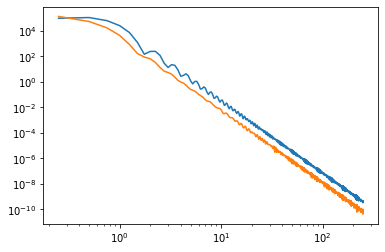

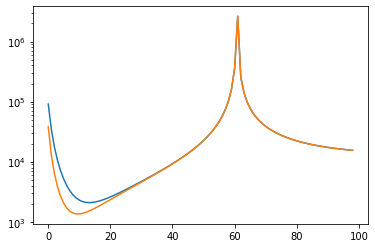

[13] 2082.41162109375
[10] 1351.4102783203125
[[2369.9699707     0.            0.            0.            0.
     0.        ]
 [   0.         1538.56994629    0.            0.            0.
     0.        ]
 [   0.            0.         2082.40991211    0.            0.
     0.        ]
 [   0.            0.            0.         1351.41003418    0.
     0.        ]
 [   0.            0.            0.            0.         2916.64990234
     0.        ]
 [   0.            0.            0.            0.            0.
  1906.07995605]]


In [1]:
DEV_PATH = '/home/frossi/dev/'
import sys
if not DEV_PATH in sys.path:
    sys.path.append(DEV_PATH)

    
from mavis import *

hdul = fits.open('MAVIS_TESTS/psd_turb.fits')
psd_turb_data = np.asarray(hdul[0].data, np.float64)
#print(_data[0])
plt.xscale('log')
plt.yscale('log')
plt.plot(psd_turb_data[0], psd_turb_data[1]) 
plt.plot(psd_turb_data[0], psd_turb_data[2]) 
plt.show()

hdul = fits.open('MAVIS_TESTS/res_noise_ngs.fits')
res_noise_ngs_data = np.asarray(hdul[0].data, np.float64)
res_noise_ngs_tip = res_noise_ngs_data[0]
res_noise_ngs_tilt = res_noise_ngs_data[1]
#print(_data[0])
plt.xscale('linear')
plt.yscale('log')
plt.plot(res_noise_ngs_tip) 
plt.plot(res_noise_ngs_tilt) 
plt.show()

minTipIdx = np.where(res_noise_ngs_tip == np.amin(res_noise_ngs_tip))
minTiltIdx = np.where(res_noise_ngs_tilt == np.amin(res_noise_ngs_tilt))
print(minTipIdx[0], res_noise_ngs_tip[minTipIdx[0][0]])
print(minTiltIdx[0], res_noise_ngs_tilt[minTiltIdx[0][0]])

hdul = fits.open('MAVIS_TESTS/Cn.fits')
Cnn_data = np.asarray(hdul[0].data, np.float64)
print(Cnn_data)

                 k_y_max                                                      
                    ⌠                                                         
                    ⎮                         ⎛               ___________⎞    
                    ⎮                         ⎜              ╱         2 ⎟    
                    ⎮               2        2⎜             ╱     2   f  ⎟    
                    ⎮       0.3664⋅f ⋅besselj ⎜2, 2⋅π⋅R⋅   ╱   k_y  + ── ⎟    
                    ⎮                         ⎜           ╱            2 ⎟    
                    ⎮                         ⎝         ╲╱            V  ⎠    
φ_Tip__turb(f) =    ⎮    ──────────────────────────────────────────────────── 
                    ⎮                              2                     11/6 
                    ⎮                   ⎛        2⎞  ⎛     2           2⎞     
                    ⎮     2  2  3   5/3 ⎜   2   f ⎟  ⎜⎛1.0⎞       2   f ⎟     
                    ⎮    π ⋅R ⋅V ⋅r₀   ⋅⎜k_y  + ──⎟ 

                  k_y_max                                                     
                     ⌠                                                        
                     ⎮                                          ⎛             
                     ⎮           ⎛             2      ⎞         ⎜             
                     ⎮           ⎜            f       ⎟        2⎜             
                     ⎮    0.3664⋅⎜1.0 - ──────────────⎟⋅besselj ⎜2, 2⋅π⋅R⋅   ╱
                     ⎮           ⎜         ⎛        2⎞⎟         ⎜           ╱ 
                     ⎮           ⎜       2 ⎜   2   f ⎟⎟         ⎝         ╲╱  
                     ⎮           ⎜      V ⋅⎜k_y  + ──⎟⎟                       
                     ⎮           ⎜         ⎜        2⎟⎟                       
                     ⎮           ⎝         ⎝       V ⎠⎠                       
φ_Tilt__turb(f) =    ⎮    ────────────────────────────────────────────────────
                     ⎮                              

 100                                                                          
  ⌠                                                                           
  ⎮                                     ⎛            _________________________
  ⎮                           2        2⎜           ╱                     2   
  ⎮     0.000741804030918512⋅f ⋅besselj ⎝2, 8.0⋅π⋅╲╱  0.0123456790123457⋅f  + 
  ⎮    ───────────────────────────────────────────────────────────────────────
  ⎮                                     2                                     
  ⎮     2 ⎛                    2      2⎞  ⎛                    2      2       
  ⎮    π ⋅⎝0.0123456790123457⋅f  + k_y ⎠ ⋅⎝0.0123456790123457⋅f  + k_y  + 0.00
  ⌡                                                                           
0.0001                                                                        

              
              
_____⎞        
   2 ⎟        
k_y  ⎠        
─────── d(k_y)
   11/6       
  ⎞           
16⎠       

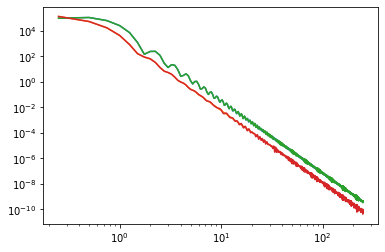

In [2]:
ff1 = turbPSDTip()
ff2 = turbPSDTilt()
display(ff1)
display(ff2)
ff1 = subsParamsByName(ff1, {'V':WindSpeed, 'R':TelescopeDiameter/2.0, 'r_0':r0_Value, 'L_0':L0_Value, 'k_y_min':0.0001, 'k_y_max':100})
ff2 = subsParamsByName(ff2, {'V':WindSpeed, 'R':TelescopeDiameter/2.0, 'r_0':r0_Value, 'L_0':L0_Value, 'k_y_min':0.0001, 'k_y_max':100})
display(ff1.rhs)

mIt = Integrator('', cp, cp.float64)

paramAndRange = ( 'f', psd_turb_data[0][0], psd_turb_data[0][-1], psd_turb_data[0].size, 'linear' )
scaleFactor = 1000*np.pi/2.0
plt.xscale('log')
plt.yscale('log')
xplot1, zplot1 = mIt.IntegralEval(ff1.lhs, ff1.rhs, [paramAndRange], [(10000, 'linear')], 'rect')
plt.plot(xplot1[0], zplot1*scaleFactor)
psd_turb_tip = zplot1*scaleFactor
xplot1, zplot1 = mIt.IntegralEval(ff2.lhs, ff2.rhs, [paramAndRange], [(10000, 'linear')], 'rect')
plt.plot(xplot1[0], zplot1*scaleFactor)
psd_turb_tilt = zplot1*scaleFactor

plt.plot(psd_turb_data[0], psd_turb_data[1])
plt.plot(psd_turb_data[0], psd_turb_data[2])

In [3]:
ffC = noisePropagationCoefficient().rhs
display(ffC)
CValue = subsParamsByName(ffC, {'D':TelescopeDiameter, 'N_sa,tot':4 })
print(CValue.evalf())

                   2  2
0.148843545191282⋅π ⋅D 
───────────────────────
        N_sa,tot       

23.5044305390979


In [4]:
display(ztfTipWindMono())
display(ztfTiltWindMono())
display(ztfTipNoiseMono())
display(ztfTiltNoiseMono())
display(tfTipWind(ztfTipWindMono()))
display(tfTiltWind(ztfTiltWindMono()))
display(noisePSDTip())
display(noisePSDTilt())
display(completeIntegralTipLO())
display(completeIntegralTiltLO())

                         1        
                     1 - ─        
                         z        
H_Tip__R(z) = ────────────────────
                        -d       1
              g_0__Tip⋅z   + 1 - ─
                                 z

                           1        
                       1 - ─        
                           z        
H_Tilt__R(z) = ─────────────────────
                          -d       1
               g_0__Tilt⋅z   + 1 - ─
                                   z

                            -d    
                  g_0__Tip⋅z      
H_Tip__N(z) = ────────────────────
                        -d       1
              g_0__Tip⋅z   + 1 - ─
                                 z

                              -d    
                   g_0__Tilt⋅z      
H_Tilt__N(z) = ─────────────────────
                          -d       1
               g_0__Tilt⋅z   + 1 - ─
                                   z

                               -2⋅ⅈ⋅π⋅f             
                               ─────────            
                                 fₗₒₒₚ              
                          1 - ℯ                     
H_Tip__R(f) = ──────────────────────────────────────
                        -2⋅ⅈ⋅π⋅d⋅f         -2⋅ⅈ⋅π⋅f 
                        ───────────        ─────────
                           fₗₒₒₚ             fₗₒₒₚ  
              g_0__Tip⋅ℯ            + 1 - ℯ         

                                 -2⋅ⅈ⋅π⋅f             
                                 ─────────            
                                   fₗₒₒₚ              
                            1 - ℯ                     
H_Tilt__R(f) = ───────────────────────────────────────
                          -2⋅ⅈ⋅π⋅d⋅f         -2⋅ⅈ⋅π⋅f 
                          ───────────        ─────────
                             fₗₒₒₚ             fₗₒₒₚ  
               g_0__Tilt⋅ℯ            + 1 - ℯ         

                   C⋅σ_WCoG__2  
φ_Tip__noise(f) = ──────────────
                               2
                  Δ_F⋅df⋅μ_WCoG 

                    C⋅σ_WCoG__2  
φ_Tilt__noise(f) = ──────────────
                                2
                   Δ_F⋅df⋅μ_WCoG 

fₘₐₓ                                                                          
 ⌠                                                                            
 ⎮   ⎛                                                                        
 ⎮   ⎜                                                                        
 ⎮   ⎜                                                                        
 ⎮   ⎜                                                                g_0__Tip
 ⎮   ⎜────────────────────────────────────────────────────────────────────────
 ⎮   ⎜                      2⋅ⅈ⋅π⋅f  -2⋅ⅈ⋅π⋅d⋅f              2⋅ⅈ⋅π⋅d⋅f        
 ⎮   ⎜                      ───────  ───────────             ─────────        
 ⎮   ⎜        2              fₗₒₒₚ      fₗₒₒₚ                  fₗₒₒₚ          
 ⎮   ⎝g_0__Tip  - g_0__Tip⋅ℯ       ⋅ℯ            + g_0__Tip⋅ℯ          + g_0__
 ⌡                                                                            
fₘᵢₙ                                                

fₘₐₓ                                                                          
 ⌠                                                                            
 ⎮   ⎛                                                                        
 ⎮   ⎜                                                                        
 ⎮   ⎜                                                                        
 ⎮   ⎜                                                                 g_0__Ti
 ⎮   ⎜────────────────────────────────────────────────────────────────────────
 ⎮   ⎜                        2⋅ⅈ⋅π⋅f  -2⋅ⅈ⋅π⋅d⋅f               2⋅ⅈ⋅π⋅d⋅f     
 ⎮   ⎜                        ───────  ───────────              ─────────     
 ⎮   ⎜         2               fₗₒₒₚ      fₗₒₒₚ                   fₗₒₒₚ       
 ⎮   ⎝g_0__Tilt  - g_0__Tilt⋅ℯ       ⋅ℯ            + g_0__Tilt⋅ℯ          + g_
 ⌡                                                                            
fₘᵢₙ                                                

In [5]:
iTip = subsParamsByName(completeIntegralTipLO(), {'d':3, 'f_loop':500})
iTilt = subsParamsByName(completeIntegralTiltLO(), {'d':3, 'f_loop':500})
fTip = iTip.function
fTilt = iTilt.function
fTipS = sp.simplify(fTip)
fTiltS = sp.simplify(fTilt)
display(fTipS)
display(fTiltS)

                                             3⋅ⅈ⋅π⋅f               ⎛⎛ ⅈ⋅π⋅f   
                                             ───────               ⎜⎜ ─────   
                             2                 125                 ⎜⎜  250    
                     g_0__Tip ⋅φ_Tip__noise⋅ℯ        - φ_Tip__wind⋅⎝⎝ℯ      - 
──────────────────────────────────────────────────────────────────────────────
          3⋅ⅈ⋅π⋅f             2⋅ⅈ⋅π⋅f   ⎛                      3⋅ⅈ⋅π⋅f        
          ───────             ───────   ⎜                      ───────        
            250                 125     ⎜        2               250          
g_0__Tip⋅ℯ        - g_0__Tip⋅ℯ        + ⎝g_0__Tip  + g_0__Tip⋅ℯ        - g_0__

 ⎞  ⅈ⋅π⋅f    ⎞  ⅈ⋅π⋅f                     
 ⎟  ─────    ⎟  ─────                     
 ⎟   250     ⎟    50                      
2⎠⋅ℯ      + 1⎠⋅ℯ                          
──────────────────────────────────────────
     ⅈ⋅π⋅f    ⅈ⋅π⋅f    ⎞  3⋅ⅈ⋅π⋅f    ⅈ⋅π⋅f
     ─────    ─────    ⎟  ────

                                                3⋅ⅈ⋅π⋅f                ⎛⎛ ⅈ⋅π⋅
                                                ───────                ⎜⎜ ────
                               2                  125                  ⎜⎜  250
                      g_0__Tilt ⋅φ_Tilt__noise⋅ℯ        - φ_Tilt__wind⋅⎝⎝ℯ    
──────────────────────────────────────────────────────────────────────────────
           3⋅ⅈ⋅π⋅f              2⋅ⅈ⋅π⋅f   ⎛                        3⋅ⅈ⋅π⋅f    
           ───────              ───────   ⎜                        ───────    
             250                  125     ⎜         2                250      
g_0__Tilt⋅ℯ        - g_0__Tilt⋅ℯ        + ⎝g_0__Tilt  + g_0__Tilt⋅ℯ        - g

f    ⎞  ⅈ⋅π⋅f    ⎞  ⅈ⋅π⋅f                      
─    ⎟  ─────    ⎟  ─────                      
     ⎟   250     ⎟    50                       
  - 2⎠⋅ℯ      + 1⎠⋅ℯ                           
───────────────────────────────────────────────
          ⅈ⋅π⋅f    ⅈ⋅π⋅f    ⎞  3⋅ⅈ⋅π⋅f    ⅈ⋅π⋅f


                                         3⋅ⅈ⋅π⋅f               ⎛⎛ ⅈ⋅π⋅f    ⎞  
                                         ───────               ⎜⎜ ─────    ⎟  
                                      2    125                 ⎜⎜  250     ⎟  
                        12.07⋅g_0__Tip ⋅ℯ        - φ_Tip__wind⋅⎝⎝ℯ      - 2⎠⋅ℯ
──────────────────────────────────────────────────────────────────────────────
          3⋅ⅈ⋅π⋅f             2⋅ⅈ⋅π⋅f   ⎛                      3⋅ⅈ⋅π⋅f        
          ───────             ───────   ⎜                      ───────        
            250                 125     ⎜        2               250          
g_0__Tip⋅ℯ        - g_0__Tip⋅ℯ        + ⎝g_0__Tip  + g_0__Tip⋅ℯ        - g_0__

ⅈ⋅π⋅f    ⎞  ⅈ⋅π⋅f                         
─────    ⎟  ─────                         
 250     ⎟    50                          
      + 1⎠⋅ℯ                              
──────────────────────────────────────────
     ⅈ⋅π⋅f    ⅈ⋅π⋅f    ⎞  3⋅ⅈ⋅π⋅f    ⅈ⋅π⋅f
     ─────    ─────    ⎟  ────

                                            3⋅ⅈ⋅π⋅f                ⎛⎛ ⅈ⋅π⋅f   
                                            ───────                ⎜⎜ ─────   
                                         2    125                  ⎜⎜  250    
                          12.07⋅g_0__Tilt ⋅ℯ        - φ_Tilt__wind⋅⎝⎝ℯ      - 
──────────────────────────────────────────────────────────────────────────────
           3⋅ⅈ⋅π⋅f              2⋅ⅈ⋅π⋅f   ⎛                        3⋅ⅈ⋅π⋅f    
           ───────              ───────   ⎜                        ───────    
             250                  125     ⎜         2                250      
g_0__Tilt⋅ℯ        - g_0__Tilt⋅ℯ        + ⎝g_0__Tilt  + g_0__Tilt⋅ℯ        - g

 ⎞  ⅈ⋅π⋅f    ⎞  ⅈ⋅π⋅f                          
 ⎟  ─────    ⎟  ─────                          
 ⎟   250     ⎟    50                           
2⎠⋅ℯ      + 1⎠⋅ℯ                               
───────────────────────────────────────────────
          ⅈ⋅π⋅f    ⅈ⋅π⋅f    ⎞  3⋅ⅈ⋅π⋅f    ⅈ⋅π⋅f


[13] 2088.3162815802293
[10] 1357.3553487930349


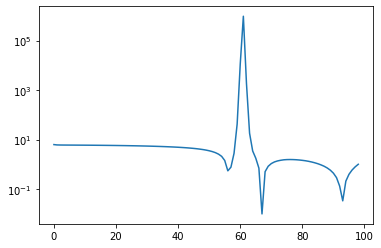

In [6]:
import functools 

psd_freq = psd_turb_data[0,:]
df = psd_freq[1]-psd_freq[0]
Df = psd_freq[-1]-psd_freq[0]
psd_tip_wind = psd_turb_data[1,:] #/scaleFactor
psd_tilt_wind = psd_turb_data[2,:] # /scaleFactor
freq_samples = psd_tip_wind.size
# qui usa la formula
psd_tip_noise = 4.828 * np.ones(freq_samples, np.float64) 
psd_tilt_noise = 4.828 * np.ones(freq_samples, np.float64)

phi_noise_tip_level = 4.828 * 2.5
phi_noise_tilt_level = 4.828 * 2.5
fTipS1 = subsParamsByName(fTipS, {'phi^noise_Tip': phi_noise_tip_level})
fTiltS1 = subsParamsByName( fTiltS, {'phi^noise_Tilt': phi_noise_tilt_level})
display(fTipS1)
display(fTiltS1)

npoints = 99
g0g = np.asarray( np.linspace(0.01, 0.99, npoints) )
uu = np.ones((freq_samples), dtype=np.float64)


resultTip = np.zeros((npoints), dtype=np.float64)
fTipS_lambda1 = sp.lambdify( [  getSymbolByName(fTipS1, 'g^Tip_0'),
                              getSymbolByName(fTipS1, 'f'),
                              getSymbolByName(fTipS1, 'phi^wind_Tip') ], fTipS1, modules="scipy" )
for ii in range(npoints):
    g0v = g0g[ii] * uu
    fTipS_lambda2 = functools.partial(fTipS_lambda1, g0v)        
    resultTip[ii] = np.absolute((np.sum(fTipS_lambda2(psd_freq, psd_tip_wind)) ) )

resultTilt = np.zeros((npoints), dtype=np.float64)
fTiltS_lambda1 = sp.lambdify( [  getSymbolByName(fTiltS1, 'g^Tilt_0'),
                              getSymbolByName(fTiltS1, 'f'),
                              getSymbolByName(fTiltS1, 'phi^wind_Tilt') ], fTiltS1, modules="scipy" )
for ii in range(npoints):
    g0v = g0g[ii] * uu
    fTiltS_lambda2 = functools.partial(fTiltS_lambda1, g0v)        
    resultTilt[ii] = np.absolute((np.sum(fTiltS_lambda2(psd_freq, psd_tilt_wind)) ) )

    
plt.xscale('linear')
plt.yscale('log')
plt.plot(np.abs(resultTip - res_noise_ngs_tip))
#plt.plot(result)
#plt.plot(res_noise_ngs_tip)

minTipIdx = np.where(resultTip == np.amin(resultTip))
print(minTipIdx[0], resultTip[minTipIdx[0][0]])
minTiltIdx = np.where(resultTilt == np.amin(resultTilt))
print(minTiltIdx[0], resultTilt[minTiltIdx[0][0]])


In [7]:
display(residualTT())
display(residualTip())
display(residualTilt())
display(residualTipPSD())
display(residualTiltPSD())
display(ztfTipWind())
display(ztfTiltWind())
display(ztfTipNoise())
display(ztfTiltNoise())
display(tfTipWind())
display(tfTiltWind())
display(tfTipNoise())
display(tfTiltNoise())

        ________________
res = ╲╱ ε_Tilt + ε_Tip 

        fₘₐₓ              
         ⌠                
ε_Tip =  ⎮   φ_Tip__res df
         ⌡                
        fₘᵢₙ              

         fₘₐₓ               
          ⌠                 
ε_Tilt =  ⎮   φ_Tilt__res df
          ⌡                 
         fₘᵢₙ               

                                    2                         2
φ_Tip__res = φ_Tip__noise⋅│H_Tip__N│  + φ_Tip__wind⋅│H_Tip__R│ 

                                       2                           2
φ_Tilt__res = φ_Tilt__noise⋅│H_Tilt__N│  + φ_Tilt__wind⋅│H_Tilt__R│ 

                                      2                
                               ⎛    1⎞                 
                               ⎜1 - ─⎟                 
                               ⎝    z⎠                 
H_Tip__R(z) = ─────────────────────────────────────────
              ⎛               1⎞ ⎛          -d       1⎞
              ⎜g_1__Tip + 1 - ─⎟⋅⎜g_0__Tip⋅z   + 1 - ─⎟
              ⎝               z⎠ ⎝                   z⎠

                                        2                 
                                 ⎛    1⎞                  
                                 ⎜1 - ─⎟                  
                                 ⎝    z⎠                  
H_Tilt__R(z) = ───────────────────────────────────────────
               ⎛                1⎞ ⎛           -d       1⎞
               ⎜g_1__Tilt + 1 - ─⎟⋅⎜g_0__Tilt⋅z   + 1 - ─⎟
               ⎝                z⎠ ⎝                    z⎠

                                           -d          
                        g_0__Tip⋅g_1__Tip⋅z            
H_Tip__N(z) = ─────────────────────────────────────────
              ⎛               1⎞ ⎛          -d       1⎞
              ⎜g_1__Tip + 1 - ─⎟⋅⎜g_0__Tip⋅z   + 1 - ─⎟
              ⎝               z⎠ ⎝                   z⎠

                                              -d          
                         g_0__Tilt⋅g_1__Tilt⋅z            
H_Tilt__N(z) = ───────────────────────────────────────────
               ⎛                1⎞ ⎛           -d       1⎞
               ⎜g_1__Tilt + 1 - ─⎟⋅⎜g_0__Tilt⋅z   + 1 - ─⎟
               ⎝                z⎠ ⎝                    z⎠

                                                       2                      
                                       ⎛     -2⋅ⅈ⋅π⋅f ⎞                       
                                       ⎜     ─────────⎟                       
                                       ⎜       fₗₒₒₚ  ⎟                       
                                       ⎝1 - ℯ         ⎠                       
H_Tip__R(f) = ────────────────────────────────────────────────────────────────
              ⎛                -2⋅ⅈ⋅π⋅f ⎞ ⎛          -2⋅ⅈ⋅π⋅d⋅f         -2⋅ⅈ⋅π
              ⎜                ─────────⎟ ⎜          ───────────        ──────
              ⎜                  fₗₒₒₚ  ⎟ ⎜             fₗₒₒₚ             fₗₒₒ
              ⎝g_1__Tip + 1 - ℯ         ⎠⋅⎝g_0__Tip⋅ℯ            + 1 - ℯ      

    
    
    
    
    
────
⋅f ⎞
───⎟
ₚ  ⎟
   ⎠

                                                         2                    
                                         ⎛     -2⋅ⅈ⋅π⋅f ⎞                     
                                         ⎜     ─────────⎟                     
                                         ⎜       fₗₒₒₚ  ⎟                     
                                         ⎝1 - ℯ         ⎠                     
H_Tilt__R(f) = ───────────────────────────────────────────────────────────────
               ⎛                 -2⋅ⅈ⋅π⋅f ⎞ ⎛           -2⋅ⅈ⋅π⋅d⋅f         -2⋅
               ⎜                 ─────────⎟ ⎜           ───────────        ───
               ⎜                   fₗₒₒₚ  ⎟ ⎜              fₗₒₒₚ             f
               ⎝g_1__Tilt + 1 - ℯ         ⎠⋅⎝g_0__Tilt⋅ℯ            + 1 - ℯ   

       
       
       
       
       
───────
ⅈ⋅π⋅f ⎞
──────⎟
ₗₒₒₚ  ⎟
      ⎠

                                                    -2⋅ⅈ⋅π⋅d⋅f                
                                                    ───────────               
                                                       fₗₒₒₚ                  
                                 g_0__Tip⋅g_1__Tip⋅ℯ                          
H_Tip__N(f) = ────────────────────────────────────────────────────────────────
              ⎛                -2⋅ⅈ⋅π⋅f ⎞ ⎛          -2⋅ⅈ⋅π⋅d⋅f         -2⋅ⅈ⋅π
              ⎜                ─────────⎟ ⎜          ───────────        ──────
              ⎜                  fₗₒₒₚ  ⎟ ⎜             fₗₒₒₚ             fₗₒₒ
              ⎝g_1__Tip + 1 - ℯ         ⎠⋅⎝g_0__Tip⋅ℯ            + 1 - ℯ      

    
    
    
    
────
⋅f ⎞
───⎟
ₚ  ⎟
   ⎠

                                                       -2⋅ⅈ⋅π⋅d⋅f             
                                                       ───────────            
                                                          fₗₒₒₚ               
                                  g_0__Tilt⋅g_1__Tilt⋅ℯ                       
H_Tilt__N(f) = ───────────────────────────────────────────────────────────────
               ⎛                 -2⋅ⅈ⋅π⋅f ⎞ ⎛           -2⋅ⅈ⋅π⋅d⋅f         -2⋅
               ⎜                 ─────────⎟ ⎜           ───────────        ───
               ⎜                   fₗₒₒₚ  ⎟ ⎜              fₗₒₒₚ             f
               ⎝g_1__Tilt + 1 - ℯ         ⎠⋅⎝g_0__Tilt⋅ℯ            + 1 - ℯ   

       
       
       
       
───────
ⅈ⋅π⋅f ⎞
──────⎟
ₗₒₒₚ  ⎟
      ⎠

In [8]:
display(completeIntegralTip())
display(completeIntegralTilt())

fₘₐₓ                                                                          
 ⌠                                                                            
 ⎮   ⎛                                                                        
 ⎮   ⎜                                                                        
 ⎮   ⎜                                                                        
 ⎮   ⎜                                                                        
 ⎮   ⎜                                                                        
 ⎮   ⎜────────────────────────────────────────────────────────────────────────
 ⎮   ⎜⎛                      2⋅ⅈ⋅π⋅f                          -2⋅ⅈ⋅π⋅f     2⋅ⅈ
 ⎮   ⎜⎜                      ───────                          ─────────    ───
 ⎮   ⎜⎜        2              fₗₒₒₚ                             fₗₒₒₚ       fₗ
 ⎮   ⎝⎝g_1__Tip  - g_1__Tip⋅ℯ        + 2⋅g_1__Tip - g_1__Tip⋅ℯ          - ℯ   
 ⌡                                                  

fₘₐₓ                                                                          
 ⌠                                                                            
 ⎮   ⎛                                                                        
 ⎮   ⎜                                                                        
 ⎮   ⎜                                                                        
 ⎮   ⎜                                                                        
 ⎮   ⎜                                                                        
 ⎮   ⎜────────────────────────────────────────────────────────────────────────
 ⎮   ⎜⎛                        2⋅ⅈ⋅π⋅f                            -2⋅ⅈ⋅π⋅f    
 ⎮   ⎜⎜                        ───────                            ─────────   
 ⎮   ⎜⎜         2               fₗₒₒₚ                               fₗₒₒₚ     
 ⎮   ⎝⎝g_1__Tilt  - g_1__Tilt⋅ℯ        + 2⋅g_1__Tilt - g_1__Tilt⋅ℯ          - 
 ⌡                                                  

In [9]:
iTip = subsParamsByName(completeIntegralTip(), {'d':3,  'f_loop':500})
iTilt = subsParamsByName(completeIntegralTilt(), {'d':3,  'f_loop':500})
fTip = iTip.function
fTilt = iTilt.function
fTipS = sp.simplify(fTip)
fTiltS = sp.simplify(fTilt)
display(fTipS)
display(fTiltS)

                                                              ⎛               
                                                              ⎜               
                                                              ⎜               
                                                              ⎜        2      
                                                             -⎝g_0__Tip ⋅g_1__
──────────────────────────────────────────────────────────────────────────────
⎛           ⎛                      ⅈ⋅π⋅f                 ⅈ⋅π⋅f    ⎞  ⅈ⋅π⋅f    
⎜           ⎜                      ─────                 ─────    ⎟  ─────    
⎜           ⎜        2              250                   250     ⎟   250     
⎝g_1__Tip - ⎝g_1__Tip  - g_1__Tip⋅ℯ      + 2⋅g_1__Tip - ℯ      + 2⎠⋅ℯ      + 1

                                                     4       ⎞                
                   7⋅ⅈ⋅π⋅f               ⎛ ⅈ⋅π⋅f    ⎞   ⅈ⋅π⋅f⎟                
                   ───────               ⎜ ─────   

                                                                 ⎛            
                                                                 ⎜            
                                                                 ⎜            
                                                                 ⎜         2  
                                                                -⎝g_0__Tilt ⋅g
──────────────────────────────────────────────────────────────────────────────
⎛            ⎛                        ⅈ⋅π⋅f                  ⅈ⋅π⋅f    ⎞  ⅈ⋅π⋅f
⎜            ⎜                        ─────                  ─────    ⎟  ─────
⎜            ⎜         2               250                    250     ⎟   250 
⎝g_1__Tilt - ⎝g_1__Tilt  - g_1__Tilt⋅ℯ      + 2⋅g_1__Tilt - ℯ      + 2⎠⋅ℯ     

                                                            4       ⎞         
                         7⋅ⅈ⋅π⋅f                ⎛ ⅈ⋅π⋅f    ⎞   ⅈ⋅π⋅f⎟         
                         ───────                ⎜ ─

(3, 200)
(2, 99, 99)


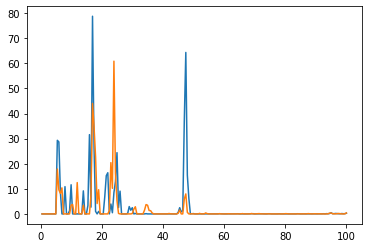

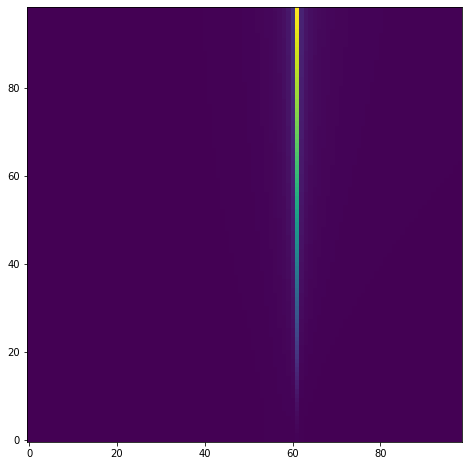

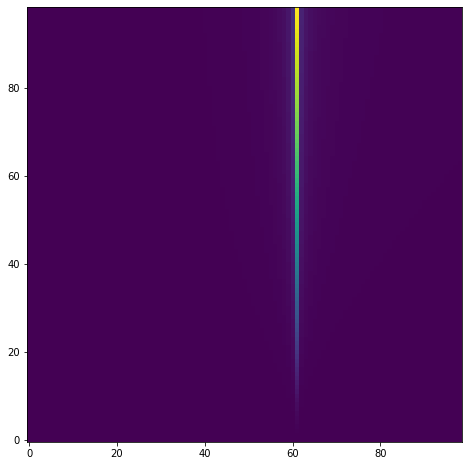

[98] [0] 71.33271789550781
[98] [0] 60.46025848388672


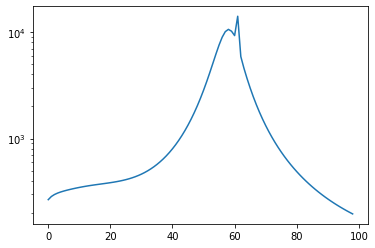

In [10]:
hdul = fits.open('MAVIS_TESTS/windpsd_mavis.fits')
windPSD = np.asarray(hdul[0].data, np.float64)
print(windPSD.shape)
plt.plot(windPSD[0], windPSD[1]) 
plt.plot(windPSD[0], windPSD[2]) 
         
hdul = fits.open('MAVIS_TESTS/minim_wind_noise12071nm2_psdmavis.fits')
windNoise = np.asarray(hdul[0].data, np.float64)
print(windNoise.shape)

plt.figure(figsize=(8, 8))
plt.subplot(1, 1, 1)
plt.imshow(windNoise[0], origin='lower', interpolation='nearest')
plt.figure(figsize=(8, 8))
plt.subplot(1, 1, 1)
plt.imshow(windNoise[1], origin='lower', interpolation='nearest')
plt.show()

minTipIdx = np.where(windNoise[0] == np.amin(windNoise[0]))
minTiltIdx = np.where(windNoise[1] == np.amin(windNoise[1]))
print(minTipIdx[0], minTipIdx[1], windNoise[0][minTipIdx[0][0], minTipIdx[1][0]])
print(minTiltIdx[0], minTiltIdx[1], windNoise[1][minTiltIdx[0][0], minTiltIdx[1][0]])

plt.yscale('log')
#plt.plot(windNoise[0][98,:]) # piu' grande
plt.plot(windNoise[0][0,:]) 
plt.show()

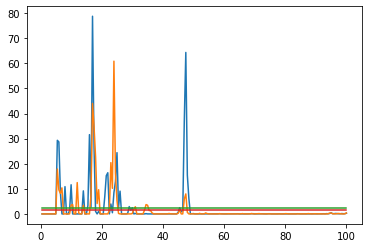

20.100504908729654


                                                            ⎛                 
                                                            ⎜                 
                                                            ⎜                 
                                                            ⎜                 
                                                           -⎝20.1005049087297⋅
──────────────────────────────────────────────────────────────────────────────
⎛           ⎛                      ⅈ⋅π⋅f                 ⅈ⋅π⋅f    ⎞  ⅈ⋅π⋅f    
⎜           ⎜                      ─────                 ─────    ⎟  ─────    
⎜           ⎜        2              250                   250     ⎟   250     
⎝g_1__Tip - ⎝g_1__Tip  - g_1__Tip⋅ℯ      + 2⋅g_1__Tip - ℯ      + 2⎠⋅ℯ      + 1

                                                       4       ⎞              
                     7⋅ⅈ⋅π⋅f               ⎛ ⅈ⋅π⋅f    ⎞   ⅈ⋅π⋅f⎟              
                     ───────               ⎜ ───── 

                                                               ⎛              
                                                               ⎜              
                                                               ⎜              
                                                               ⎜              
                                                              -⎝20.10050490872
──────────────────────────────────────────────────────────────────────────────
⎛            ⎛                        ⅈ⋅π⋅f                  ⅈ⋅π⋅f    ⎞  ⅈ⋅π⋅f
⎜            ⎜                        ─────                  ─────    ⎟  ─────
⎜            ⎜         2               250                    250     ⎟   250 
⎝g_1__Tilt - ⎝g_1__Tilt  - g_1__Tilt⋅ℯ      + 2⋅g_1__Tilt - ℯ      + 2⎠⋅ℯ     

                                                             4       ⎞        
                          7⋅ⅈ⋅π⋅f                ⎛ ⅈ⋅π⋅f    ⎞   ⅈ⋅π⋅f⎟        
                          ───────                ⎜ 

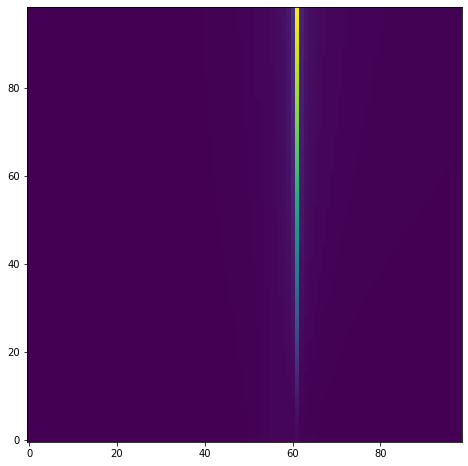

In [11]:
# phi_noise e' una costante pari a sigma^2 cog # / Df 
import functools 
hdul = fits.open('MAVIS_TESTS/windpsd_mavis.fits')
psd_data = np.asarray(hdul[0].data, np.float64)

psd_freq = psd_data[0,:]
df = psd_freq[1]-psd_freq[0]
Df = psd_freq[-1]-psd_freq[0]
psd_tip_wind = psd_data[1,:]
psd_tilt_wind = psd_data[2,:]
freq_samples = psd_tip_wind.size
psd_tip_noise = np.sum(psd_tip_wind) * np.ones(freq_samples, np.float64) / float(freq_samples)
psd_tilt_noise = np.sum(psd_tilt_wind) * np.ones(freq_samples, np.float64) / float(freq_samples)
plt.xscale('linear')
plt.yscale('linear')
plt.plot(psd_freq, psd_tip_wind)
plt.plot(psd_freq, psd_tilt_wind)
plt.plot(psd_freq, psd_tip_noise)
plt.plot(psd_freq, psd_tilt_noise)
plt.show()

phi_noise_tip_level = (1000.0 / Df) / df
print(phi_noise_tip_level)
phi_noise_tilt_level = (1000.0 / Df) / df
fTipS1 = subsParamsByName(fTipS, {'phi^noise_Tip': phi_noise_tip_level})
fTiltS1 = subsParamsByName( fTiltS, {'phi^noise_Tilt': phi_noise_tilt_level})
display(fTipS1)
display(fTiltS1)

npoints = 99
g0g, g1g = np.meshgrid(np.linspace(0.01,0.99,npoints), np.linspace(0.01,0.99,npoints)) 

resultTip = np.zeros((npoints,npoints), dtype=np.float64)
fTipS_lambda1 = sp.lambdify( [  getSymbolByName(fTipS1, 'g^Tip_0'),
                              getSymbolByName(fTipS1, 'g^Tip_1'),
                              getSymbolByName(fTipS1, 'f'),
                              getSymbolByName(fTipS1, 'phi^wind_Tip') ], fTipS1, modules="scipy" )

uu = np.ones((freq_samples), dtype=np.float64)
for ii in range(npoints):
    for jj in range(npoints):
        g0v = g0g[ii][jj] * uu
        g1v = g1g[ii][jj] * uu
        fTipS_lambda2 = functools.partial(fTipS_lambda1, g0v, g1v)        
        resultTip[ii][jj] = np.absolute((np.sum(fTipS_lambda2(psd_freq, psd_tip_wind)) ) )
#        result[ii][jj] = np.absolute((np.sum(fTipS_lambda1( g0v, g1v, psd_tip_wind, psd_freq)) ) )


plt.figure(figsize=(8, 8))
plt.subplot(1, 1, 1)
plt.imshow(resultTip, origin='lower', interpolation='nearest')

[98] [0] 85.43018945918081


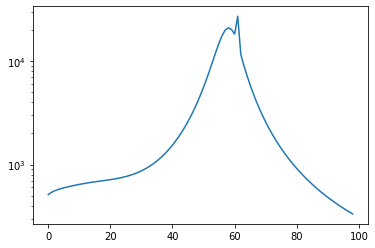

In [12]:
minTipIdx = np.where(resultTip == np.amin(resultTip))
#minTiltIdx = np.where(windNoise[1] == np.amin(windNoise[1]))
print(minTipIdx[0], minTipIdx[1], resultTip[minTipIdx[0][0], minTipIdx[1][0]])
#print(minTiltIdx[0], minTiltIdx[1], windNoise[1][minTiltIdx[0][0], minTiltIdx[1][0]])

plt.yscale('log')
#plt.plot(windNoise[0][98,:]) # piu' grande
plt.plot(resultTip[0,:]) 
plt.show()